In [66]:
import numpy as np
# events = np.load("/home/soft/code/MambaMOS/exp/semantic_kitti/demo7/result/merge_data_0000000277_segment00.npy")
events = np.load("/media/sdb2/grs/data/EVT3/scene1/raw_data/0000000004.npz")
# events.shape
for key in events:
    print(f"Array '{key}' shape: {events[key].shape}")

Array 'x' shape: (935991,)
Array 'y' shape: (935991,)
Array 't' shape: (935991,)
Array 'p' shape: (935991,)


In [51]:
def render(x, y, t, p, shape):
    # print(f"x shape: {x.shape}, y shape: {y.shape}")
    # print(f"x values: {x[:10]}, y values: {y[:10]}") 
    p = (p > 0).astype(int)
    img = np.full(shape=tuple(shape) + (3,), fill_value=255, dtype="uint8")
    img[y, x, :] = 0
    img[y, x, p] = 255
    return img

def visualize_points(points):
    # Extract x, y, z, and p from the points
    # x, y, _, p = points[:, 0], points[:, 1], points[:, 2], points[:, 3]
    x, y, _, p = points['x'], points['y'], points['t'], points['p']
    # Scale and convert to integer
    # Find the range of x and y
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    # print(tag, x_min, x_max, y_min, y_max)
    
    # Normalize x and y to the range [0, 460] and [0, 352]
    x = ((x - x_min) / (x_max - x_min) * 1280).astype(int)
    y = ((y - y_min) / (y_max - y_min) * 720).astype(int)
    
    # Filter out points that are out of bounds (should not happen after normalization)
    # valid_mask = (x >= 0) & (x < 460) & (y >= 0) & (y < 352)
    valid_mask = (x >= 0) & (x < 1280) & (y >= 0) & (y < 720)
    x = x[valid_mask]
    y = y[valid_mask]
    p = p[valid_mask]
    
    # Assuming z-coordinate is binary (1 or -1) for visualization
    # img = render(x, y, None, p, (352, 460))
    img = render(x, y, None, p, (720, 1280))

    img = img.astype(np.uint8)
    # img = np.transpose(img, (2, 0, 1))
    return img

In [67]:
# x = events[:,0]
# y = events[:,1]
# t = events[:,2]
# p = events[:,3]
x = events['x']
y = events['y']
t = events['t']
p = events['p']

In [13]:
x.shape

(973198,)

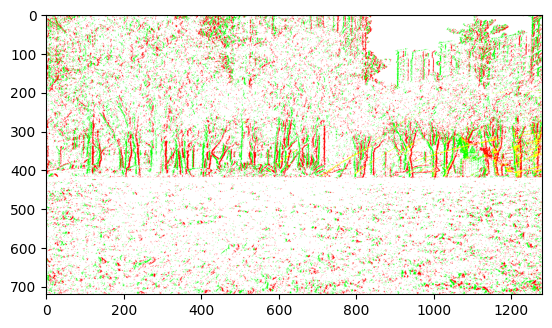

In [68]:
import matplotlib.pyplot as plt
# shape = [352, 460]
shape = [720,1280]
img0 = visualize_points(events)
handle = plt.imshow(img0)
plt.show(block=False)
plt.pause(0.002)

In [74]:
x = events['x']
y = events['y']
t = events['t']
polarity = events['p']

# 假设网格大小
grid_size = 0.09

# 将坐标归一化到网格大小
scaled_coord = np.vstack((x, y)).T / np.array(grid_size)
# scaled_coord = np.vstack((x, y)).T / np.array([720, 1280])

# 网格化坐标
grid_coord = np.floor(scaled_coord).astype(int)
# grid_coord = np.floor(scaled_coord * np.array([720, 1280])).T.astype(int)

# 计算最小坐标
min_coord = grid_coord.min(0)
# min_coord_x = grid_coord.min(0)[0]
# min_coord_y = grid_coord.min(0)[1]
grid_coord -= min_coord
scaled_coord -= min_coord
min_coord = min_coord * np.array(grid_size)

# 为网格坐标生成唯一哈希值
def hash_coordinates(coords):
    return coords[:, 0] * 31 + coords[:, 1] * 37  # 简单的哈希函数，假设坐标是二维的

key = hash_coordinates(grid_coord)

# 排序坐标并计算去重后的索引
idx_sort = np.argsort(key)
key_sort = key[idx_sort]
_, inverse, count = np.unique(key_sort, return_inverse=True, return_counts=True)

# 计算每个网格内的采样点
a = np.cumsum(np.insert(count, 0, 0)[0:-1])
b = np.random.randint(0, count.max(), count.size)
idx_select = (a + b % count)
idx_unique = idx_sort[idx_select]

# 获取采样后的坐标和时间戳
coordinates_sampled = np.vstack((x[idx_unique], y[idx_unique])).T
time_sampled = t[idx_unique]
polarity = polarity[idx_unique]


In [47]:
import numpy as np
# events = np.load("/home/soft/code/MambaMOS/exp/semantic_kitti/demo7/result/merge_data_0000000277_segment00.npy")
events = np.load("/media/sdb2/grs/data/EVT3/scene1/merge_data/rain_1/0000000004.npz")
# events.shape
for key in events:
    print(f"Array '{key}' shape: {events[key].shape}")

Array 'x' shape: (973198,)
Array 'y' shape: (973198,)
Array 't' shape: (973198,)
Array 'p' shape: (973198,)


In [48]:
coordinates_sampled.shape

(388, 2)

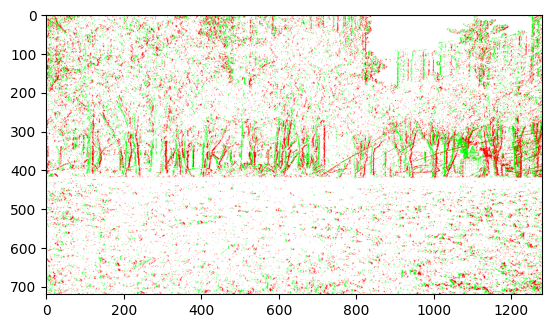

In [76]:
import matplotlib.pyplot as plt
shape = [720, 1280]
img = render(x=coordinates_sampled[:, 0], y=coordinates_sampled[:, 1], t=time_sampled, p=polarity, shape=shape)
handle = plt.imshow(img)
plt.show(block=False)
plt.pause(0.002)

In [29]:
coordinates_sampled[:, 0].shape

(33491,)